### PV Secondary Target Selection

## sga_offaxis
### Method to create the secondary targeting file for the off-axis points of large galaxies (from the SGA) in the BGS sample

##### Author: Kelly Douglass (University of Rochester)

See `/project/projectdirs/desi/target/secondary/README` for output data model

### Target classes
1. End points on the major axis
2. Points along the major axis
3. **Points off-axis**

In [1]:
from astropy.table import Table
from astropy.io import fits

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib notebook

from legacy_images import get_cutout

## Target catalogs

[Siena Galaxy Atlas](https://portal.nersc.gov/project/cosmo/temp/ioannis/SGA-html-dr9alpha/SGA-2arcmin.html)

In [2]:
# Target catalog file names

input_directory = '/Users/kellydouglass/Documents/Research/data/SGA/'

#input_filename = input_directory + 'SGA_BGS_inspecfootprint.fits'
input_filename = input_directory + 'SGA-ellipse-v3.0.kd.fits'

hdu = fits.open(input_filename)
#large_galaxies = Table.read(input_filename, format='fits')
large_galaxies = hdu[1].data
hdu.close()

## Set third priority: points off the major axis

### Within the DESI footprint

In [3]:
# This will not be necessary to run when using Christophe's entire target file.

SGA_galaxies = large_galaxies[large_galaxies['IN_FOOTPRINT']]

### Large galaxies

We target only those galaxies with $R(25) > 1.4'$ (the fiber patrol radius) along the **semi-minor axis**.

In [4]:
max_patrol_radius = 1.4 # arcminutes

#lg_SGA = SGA_galaxies[SGA_galaxies['RADIUS_SB25']*SGA_galaxies['BA'] >= max_patrol_radius*60]
#lg_SGA = large_galaxies[large_galaxies['RADIUS_SB25']*large_galaxies['BA'] >= 2*max_patrol_radius*60]
lg_SGA = SGA_galaxies[SGA_galaxies['DIAM']*SGA_galaxies['BA'] >= 2*max_patrol_radius]

In [5]:
lg_SGA_table = Table(lg_SGA)

In [6]:
lg_SGA_table.show_in_notebook()

idx,SGA_ID,GALAXY,PGC,SGA_RA,SGA_DEC,MORPHTYPE,PA_LEDA,D25_LEDA,BA_LEDA,Z_LEDA,SB_D25_LEDA,MAG_LEDA,BYHAND,REF,IN_FOOTPRINT,IN_FOOTPRINT_GRZ,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER,BRICKNAME,DIAM,DIAM_REF,PA,BA,ELLIPSEBIT,DROPBIT,RELEASE,BRICKID,OBJID,BRICK_PRIMARY,MASKBITS,ITERATIVE,TYPE,RA,DEC,RA_IVAR,DEC_IVAR,BX,BY,DCHISQ [5],EBV,MJD_MIN,MJD_MAX,REF_CAT,REF_ID,PMRA,PMDEC,PARALLAX,PMRA_IVAR,PMDEC_IVAR,PARALLAX_IVAR,REF_EPOCH,GAIA_POINTSOURCE,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_G_N_OBS,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_N_OBS,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_N_OBS,GAIA_PHOT_VARIABLE_FLAG,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_ASTROMETRIC_EXCESS_NOISE_SIG,GAIA_ASTROMETRIC_N_OBS_AL,GAIA_ASTROMETRIC_N_GOOD_OBS_AL,GAIA_ASTROMETRIC_WEIGHT_AL,GAIA_DUPLICATED_SOURCE,GAIA_A_G_VAL,GAIA_E_BP_MIN_RP_VAL,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,APFLUX_G [8],APFLUX_R [8],APFLUX_Z [8],APFLUX_RESID_G [8],APFLUX_RESID_R [8],APFLUX_RESID_Z [8],APFLUX_BLOBRESID_G [8],APFLUX_BLOBRESID_R [8],APFLUX_BLOBRESID_Z [8],APFLUX_IVAR_G [8],APFLUX_IVAR_R [8],APFLUX_IVAR_Z [8],APFLUX_MASKED_G [8],APFLUX_MASKED_R [8],APFLUX_MASKED_Z [8],APFLUX_W1 [5],APFLUX_W2 [5],APFLUX_W3 [5],APFLUX_W4 [5],APFLUX_RESID_W1 [5],APFLUX_RESID_W2 [5],APFLUX_RESID_W3 [5],APFLUX_RESID_W4 [5],APFLUX_IVAR_W1 [5],APFLUX_IVAR_W2 [5],APFLUX_IVAR_W3 [5],APFLUX_IVAR_W4 [5],MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,NOBS_G,NOBS_R,NOBS_Z,NOBS_W1,NOBS_W2,NOBS_W3,NOBS_W4,RCHISQ_G,RCHISQ_R,RCHISQ_Z,RCHISQ_W1,RCHISQ_W2,RCHISQ_W3,RCHISQ_W4,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACFLUX_W1,FRACFLUX_W2,FRACFLUX_W3,FRACFLUX_W4,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,ANYMASK_G,ANYMASK_R,ANYMASK_Z,ALLMASK_G,ALLMASK_R,ALLMASK_Z,WISEMASK_W1,WISEMASK_W2,PSFSIZE_G,PSFSIZE_R,PSFSIZE_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,PSFDEPTH_W1,PSFDEPTH_W2,PSFDEPTH_W3,PSFDEPTH_W4,WISE_COADD_ID,WISE_X,WISE_Y,SERSIC,SERSIC_IVAR,SHAPE_R,SHAPE_R_IVAR,SHAPE_E1,SHAPE_E1_IVAR,SHAPE_E2,SHAPE_E2_IVAR,RADIUS_SB22,RADIUS_SB22.5,RADIUS_SB23,RADIUS_SB23.5,RADIUS_SB24,RADIUS_SB24.5,RADIUS_SB25,RADIUS_SB25.5,RADIUS_SB26,G_MAG_SB22,R_MAG_SB22,Z_MAG_SB22,G_MAG_SB22.5,R_MAG_SB22.5,Z_MAG_SB22.5,G_MAG_SB23,R_MAG_SB23,Z_MAG_SB23,G_MAG_SB23.5,R_MAG_SB23.5,Z_MAG_SB23.5,G_MAG_SB24,R_MAG_SB24,Z_MAG_SB24,G_MAG_SB24.5,R_MAG_SB24.5,Z_MAG_SB24.5,G_MAG_SB25,R_MAG_SB25,Z_MAG_SB25,G_MAG_SB25.5,R_MAG_SB25.5,Z_MAG_SB25.5,G_MAG_SB26,R_MAG_SB26,Z_MAG_SB26,G_MAG_TOT,R_MAG_TOT,Z_MAG_TOT,PREBURNED,FREEZE
0,1073110,NGC4761,43757,193.2737835,-9.203913499999999,S0,0.0,2.6915345,0.77624714,0.014207162,24.26748,13.489,False,LEDA-20181114,True,True,252381,NGC4761_GROUP,3,True,193.27914585004353,-9.201545297764332,3.0394711,1932m092,4.358234,SB26,80.378105,0.8248116,0,0,9008,-1,982,True,4240,False,SER,193.2737424494408,-9.204010064527282,124518850000000.0,162141960000000.0,1117.2893,1010.13245,4949344.0 .. 258513360.0,0.05147524,57770.43775624628,57923.51668468228,L3,1073110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,False,0.0,0.0,0,0,0.0,False,0.0,0.0,0.0,0.0,0,13937.603,30612.482,56821.164,26132.32,16973.37,8194.188,6102.9004,0.35752648,0.07744444,0.044114836,0.007803214,0.0038665193,3.78553e-05,1.1780182e-06,221.50352,486.50925,903.031,221.76486,487.0764,904.0485,55.259693 .. 2245.917,132.09291 .. 5107.965,272.7827 .. 9711.145,-19.621834 .. -16.405827,-54.710064 .. 125.27567,-183.94556 .. 448.7293,-19.621834 .. -16.405827,-54.710064 .. 125.27567,-183.94556 .. 448.7293,66.55122 .. 2.9411488,13.724834 .. 0

Ok, so there are definitely too many objects to target by hand.  Instead of placing the fibers on some grid on the galaxy, what if we target concentric ellipses of some given separation?  The same spacing as what we have for the major axis maybe?

In [7]:
lg_SGA_table.write('SGA_large_galaxies.fits', format='fits')

#### Chunk up galaxy list into sets of 50

In [9]:
for i in range(int(np.ceil(len(lg_SGA_table)/50))):
    
    start_idx = i*50
    
    sub_table = lg_SGA_table[start_idx : start_idx + 50]
    
    sub_table_filename = 'SGA_large_galaxies_' + str(i) + '.fits'
    
    sub_table.write(sub_table_filename, format='fits')

### Extract footprint from Legacy Survey imaging

large_gals/NGC4761.jpg exists.


<IPython.core.display.Javascript object>


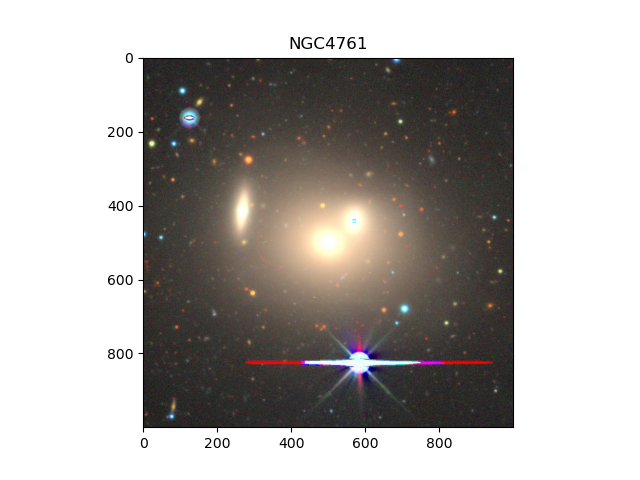

In [11]:
# Single galaxy example

i = 0

img_file = get_cutout(lg_SGA_table['GALAXY'][i], 
                      lg_SGA_table['SGA_RA'][i], 
                      lg_SGA_table['SGA_DEC'][i], 
                      verbose=True)

img = mpl.image.imread(img_file)

plt.imshow(img)
plt.title('{}'.format(lg_SGA_table['GALAXY'][i]));